# AirBNB Open Data Analysis

This analysis is for Project 1 in Data Scientist Nanodegree Program. In this project, **Seattle** and **Bonston** AirBNB Open Data will be used to understand the 3 questions below:<br> 

    1) How much AirBNB homes are earning in certain time frames and areas? 
    2) A comparison in rates between the two cities.
    3) Will the properties helps to predict price?
    
 First, read in the datasets.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

Sea_cal_df = pd.read_csv('./Seattle_AirBNB_Open_Data/calendar.csv')
Sea_list_df = pd.read_csv('./Seattle_AirBNB_Open_Data/listings.csv')
Sea_rev_df = pd.read_csv('./Seattle_AirBNB_Open_Data/reviews.csv')

Bon_cal_df = pd.read_csv('./Bonston_AirBNB_Open_Data/calendar.csv')
Bon_list_df = pd.read_csv('./Bonston_AirBNB_Open_Data/listings.csv')
Bon_rev_df = pd.read_csv('./Bonston_AirBNB_Open_Data/reviews.csv')

Sea_cal_df.head(500)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
...,...,...,...,...
495,953595,2016-05-13,t,$175.00
496,953595,2016-05-14,t,$177.00
497,953595,2016-05-15,t,$162.00
498,953595,2016-05-16,t,$175.00


In [2]:
Sea_list_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [3]:
Sea_list_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [4]:
Sea_rev_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [5]:
Bon_rev_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


**Question 1**: <br> 

How much AirBNB homes are earning in certain time frames and areas? For example, 30 days

To answer this question, first, we need to gather price data and then to handle categorical and missing data. we then can calculate the amount that AirBNB homes earn equals the sum of the price data of the booked days plus the sum of cleanning fee. It should be noted that each home has its minimum nights and maximum nights, so the actual number of stays can only be a estimated value, therefore, here we simply exclude the cleaning fee. 

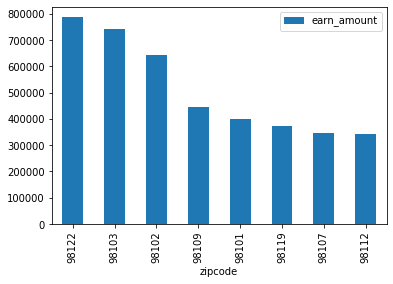

In [6]:
#generate sub data frame earn_df from Sea_list_df
earn_df = Sea_list_df[['zipcode', 'price', 'availability_30']]

#remove all the rows with null values
earn_df.dropna(axis=0)

#calculate the earn amount of each home and insert it as the last column in the data frame earn_df
earn_amount = earn_df['price'].str.replace(',', '').str.replace('$', '').astype(float)*(30-earn_df['availability_30'])
earn_df.insert(3,'earn_amount', earn_amount)

#use groupby method to group the sum of earn amount of each area by zipcode
plot_df = earn_df.groupby('zipcode')['earn_amount'].sum().reset_index()
plot_df.sort_values(['earn_amount'], ascending=False).head(8).plot(kind='bar', y='earn_amount', x='zipcode')

**Conclusion for question 1:** <br>
From the above figure, the monthly earnings differ with areas, the zipcode "98122" earns the highest. 

**Question 2**: <br> 
A comparison in average rates of each room between the two cities.<br> 
In this question, we simply calculate the average room rate as the price/bedrooms. 

In [7]:
#generate sub data frame Sea_rate_df from Sea_list_df
Sea_rate_df = Sea_list_df[['id', 'price', 'bedrooms']]
Bon_rate_df = Bon_list_df[['id', 'price', 'bedrooms']]

#calculate averate room rate of two cities
Sea_rate_df.dropna(subset=['price','bedrooms'], axis=0)
Sea_rate_df.drop(Sea_rate_df.loc[Sea_rate_df['bedrooms']==0].index, inplace=True)
Sea_average_rate = Sea_rate_df['price'].str.replace(',', '').str.replace('$', '').astype(float)/Sea_rate_df['bedrooms']

Bon_rate_df.dropna(subset=['price','bedrooms'],axis=0)
Bon_rate_df.drop(Bon_rate_df.loc[Bon_rate_df['bedrooms']==0].index, inplace=True)
Bon_average_rate = Bon_rate_df['price'].str.replace(',', '').str.replace('$', '').astype(float)/Bon_rate_df['bedrooms']

#print the average room rate of two cities
print("averate room rate at Seattle = ", Sea_average_rate.mean())
print("averate room rate at Bonston = ",Bon_average_rate.mean())


averate room rate at Seattle =  92.65139188815061
averate room rate at Bonston =  132.59850466342255


C:\Users\gjieqing\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


**Conclusion for question 2:**<br>
From the above results, the city **"Bonston"** has a higher average room rate than the city **"Seattle"**.


**Question 3**: <br> 
Will the properties helps to predict price?<br> 
In this question, we try to find the relationship between price and home properties. We have notices that there are a large number of properties in the list data frame, so here we only focus on the effect of a few properties on the homes in Seattle: <br>
property type, beds and review_scores_rating.

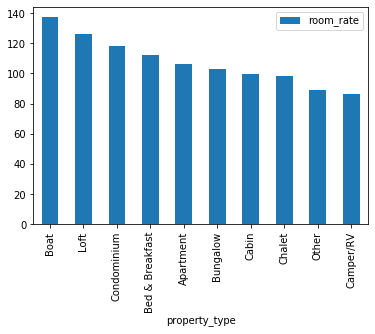

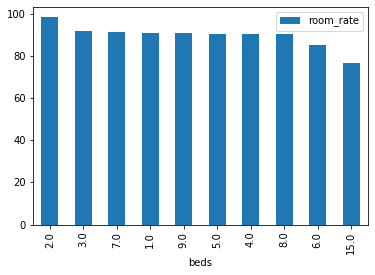

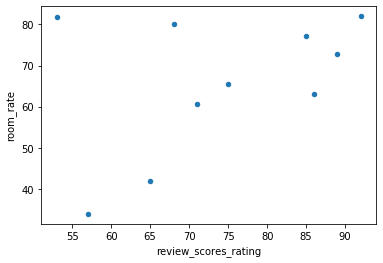

In [8]:
#generate data frame 
Sea_prop_df = Sea_list_df[['id', 'price', 'bedrooms','property_type','beds', 'review_scores_rating']]

#clean data to remove nan rows with NAN values in all these columns and also remove rows with 0 bedroom and treat price value
Sea_prop_df.dropna(axis=0)
Sea_prop_df.drop(Sea_prop_df.loc[Sea_prop_df['bedrooms']==0].index, inplace=True)
Sea_prop_rate = Sea_prop_df['price'].str.replace(',', '').str.replace('$', '').astype(float)/Sea_prop_df['bedrooms']

#insert a column at the end with the property room rate
Sea_prop_df.insert(5,'room_rate', Sea_prop_rate) 

#group data with the three properties
df_proptype = Sea_prop_df.groupby(['property_type'])['room_rate'].mean().reset_index()
df_beds = Sea_prop_df.groupby(['beds'])['room_rate'].mean().reset_index()
df_review_scores = Sea_prop_df.groupby(['review_scores_rating'])['room_rate'].mean().reset_index()

#plot to show relationship between properties and price
df_proptype.sort_values(['room_rate'], ascending=False).head(10).plot(kind='bar', y='room_rate', x='property_type')
df_beds.sort_values(['room_rate'], ascending=False).head(10).plot(kind='bar', y='room_rate', x='beds')
df_review_scores.sort_values(['room_rate'], ascending=True).head(10).plot(kind='scatter', y='room_rate', x='review_scores_rating')


**Conclusion for question 3:**<br>
From above plots, we can find that: <br> 
1) property type has a strong relationship with the price, with boat being the most expensive type; <br> 
2) The number of beds only markly affect the price when it is above 15; <br> 
3) the review scorce rating has some relationship with room rate, with generate higher review_scores_rating corresponding to higher room rate, but there are also some expensive homes with low review scores, so the review score rating may not be able to reflect the property price. <br> 
